In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import missingno

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")

In [ ]:
df.head()

In [4]:
df.shape

(13611, 17)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
missingno.bar(df)

In [ ]:
df.plot(figsize=(16, 12))

In [ ]:
sns.countplot(x="Class", data=df)

In [19]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [20]:
df["Class"] = label_encoder(df["Class"])

Class ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [21]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
y_pred = knn.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7921410209327947

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.47      0.52       281
           1       1.00      1.00      1.00       117
           2       0.74      0.79      0.77       318
           3       0.83      0.90      0.86       687
           4       0.75      0.82      0.78       381
           5       0.85      0.75      0.80       414
           6       0.80      0.80      0.80       525

    accuracy                           0.79      2723
   macro avg       0.80      0.79      0.79      2723
weighted avg       0.79      0.79      0.79      2723



In [30]:
cm = confusion_matrix(y_test, y_pred)

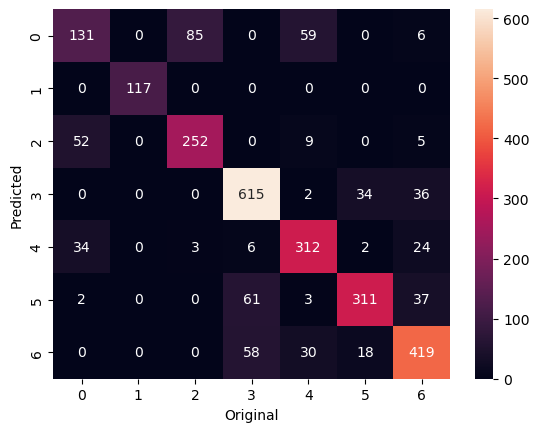

In [32]:
plt.figure()
sns.heatmap(cm, annot=True, fmt=".0f")
plt.ylabel("Predicted")
plt.xlabel("Original")
plt.show()

In [33]:
pickle.dump(knn, open("knn.pkl", "wb"))